In [1]:
import numpy as np
import xarray as xr
import xsimlab as xs
import matplotlib.pyplot as plt

from thermal import single_node

In [2]:
single_node
# single_node.all_vars_dict

<xsimlab.Model (3 processes, 11 inputs)>
spacecraft
    radius        [in] spacecraft radius [m]
    emis          [in] spacecraft emissivity
    mass          [in] spacecraft mass [kg]
    spec_heat     [in] spacecraft specific heat
    Q_gen         [in] spacecraft power dissipation
orbit
    R             [in] body radius
    h             [in] orbit altitude
    tau           [in] orbit period
    case          [in] hot/ cold case
    beta          [in] beta, radians
thermal
    T_init        [in] initial temperature

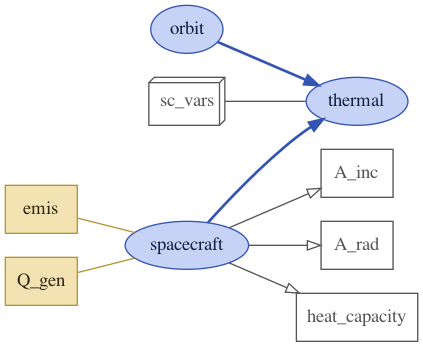

In [3]:
# node_diag = single_node.visualize(show_variables='in')
# node_diag = single_node.visualize(show_inputs=True)#, show_variables=True)
# node_diag = single_node.visualize(show_variables=False)

node_diag = single_node.visualize(show_only_variable=('thermal', 'sc_vars'))


node_diag

In [4]:
# %load_ext xsimlab.ipython

In [5]:
# %create_setup single_node --default --verbose

In [6]:
orbit_tau = 5400
orbits = 6

In [7]:
# %create_setup single_node --default --verbose

ds_in = xs.create_setup(
    model=single_node,
    clocks={
        'time': np.linspace(0,orbits*orbit_tau, 2000)

    },
    input_vars={
        # spacecraft radius [m]
        'spacecraft__radius': 0.2111,
        # spacecraft emissivity
        'spacecraft__emis': 0.9,
        # spacecraft mass [kg]
        'spacecraft__mass': 4.0,
        # spacecraft specific heat
        'spacecraft__spec_heat': 897.0,
        # spacecraft power dissipation
        'spacecraft__Q_gen': 15.0,
        # body radius
        'orbit__R': 6378100.0,
        # orbit altitude
        'orbit__h': 525000.0,
        # orbit period
        'orbit__tau': 5400,
        # hot/ cold case
        'orbit__case': 'hot',
        # beta, radians
        'orbit__beta': 0,
        # initial temperature
        'thermal__T_init': 290.0,
    },
    output_vars={
    'thermal__T_out': 'time'
    }
)


In [8]:
ds_in

<xarray.Dataset>
Dimensions:                (time: 2000)
Coordinates:
  * time                   (time) float64 0.0 16.21 32.42 ... 3.238e+04 3.24e+04
Data variables:
    spacecraft__radius     float64 0.2111
    spacecraft__emis       float64 0.9
    spacecraft__mass       float64 4.0
    spacecraft__spec_heat  float64 897.0
    spacecraft__Q_gen      float64 15.0
    orbit__R               float64 6.378e+06
    orbit__h               float64 5.25e+05
    orbit__tau             int64 5400
    orbit__case            <U3 'hot'
    orbit__beta            int64 0
    thermal__T_init        float64 290.0

In [9]:
ds_out = ds_in.xsimlab.run(model=single_node)

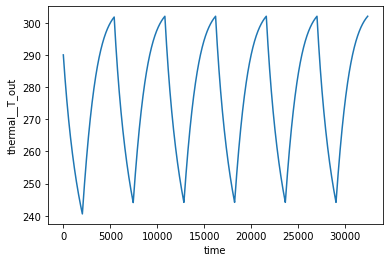

In [10]:
ds_out.thermal__T_out.plot()